<a href="https://colab.research.google.com/github/jgabrielg99/Python/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

Data Dictionary
order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost_of_the_order: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.1

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data set .csv file
data = pd.read_csv('/content/drive/MyDrive/AIML Course/Files/foodhub_order.csv')

### Understanding the structure of the data

In [ ]:
# view the first five rows of the data set
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# check the number of rows and columns of the data set
data.shape

(1898, 9)

There are 1898 rows and 9 columns in this data set.

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# get a description of the types and counts of data within each series
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


*   There is 1 column containing floats, 4 columns containing integers, and 4 columns containing objects (strings and/or other data types)
*  Rating is listed as an object whereas integer would be expected. There may be missing or unexpected values here.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# number of null/missing values
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0





*   There are no missing values from the data set. However there are likely unexpected values in the ratings column





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# view the statistical data of the numerical categories
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
print('The minimum food preparation time is', data['food_preparation_time'].min(), 'minutes')
print('The average food preparation time is', round(data['food_preparation_time'].mean().astype(float), 2), 'minutes')
print('The maximum food preparation time is', data['food_preparation_time'].max(), 'minutes')

The minimum food preparation time is 20 minutes
The average food preparation time is 27.37 minutes
The maximum food preparation time is 35 minutes


### **Question 5:** How many orders are not rated?

In [ ]:
# count the number of unrated orders
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


There are 736 orders that were not given a rating

In [ ]:
# count the number of unique order id's
data['order_id'].nunique()

1898

There are no duplicate order id's in this data set

In [ ]:
# count the number of unique customer id's
data['customer_id'].nunique()

1200

There are only 1200 unique customer id's which infers that there 698 orders were placed by a returning customer

In [ ]:
# count the number of restaurants
data['restaurant_name'].nunique()

178

There are a total of 178 different restaurants represented in this data set

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

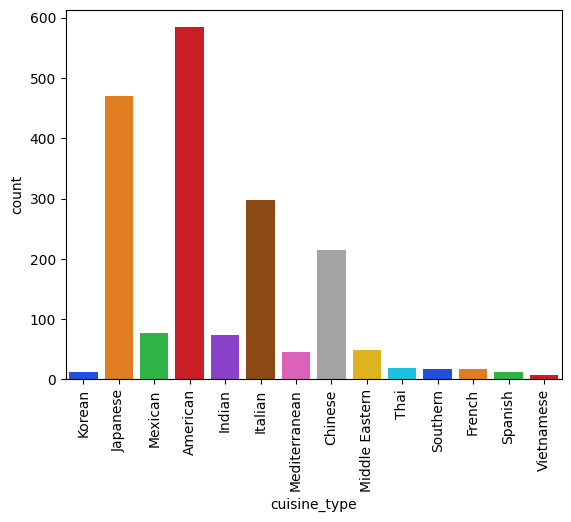

In [ ]:
# compare popularity of cuisine types
sns.countplot(data=data, x='cuisine_type', hue='cuisine_type', palette='bright')
plt.xticks(rotation=90)
plt.show()



*   American is the most popular cuisine type ordered followed by Japanese, Italian, and Chinese
*   Vietnamese is the least commonly ordered cuisine



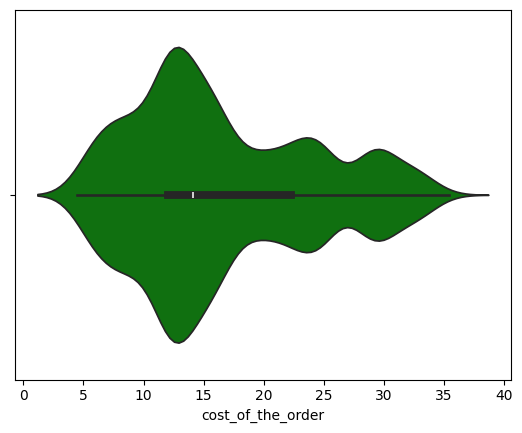

In [ ]:
# plot the cost of order
sns.violinplot(data=data, x='cost_of_the_order', color='green');
plt.show()





*   The cost of the order appears right skewed and multimodal
*   There are no outliers in this particular category



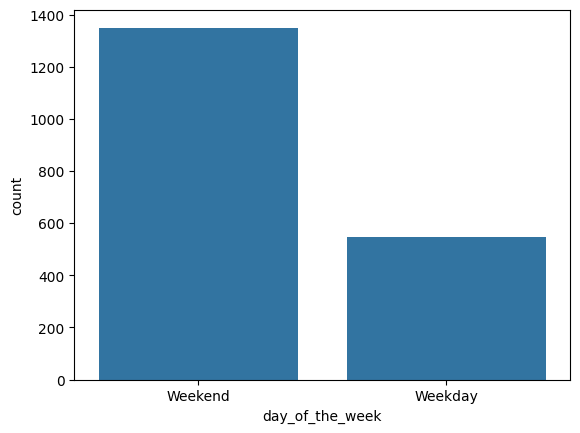

In [ ]:
# visualize days in which orders are placed
sns.countplot(data=data, x='day_of_the_week');

More orders are placed on weekends than during the week.

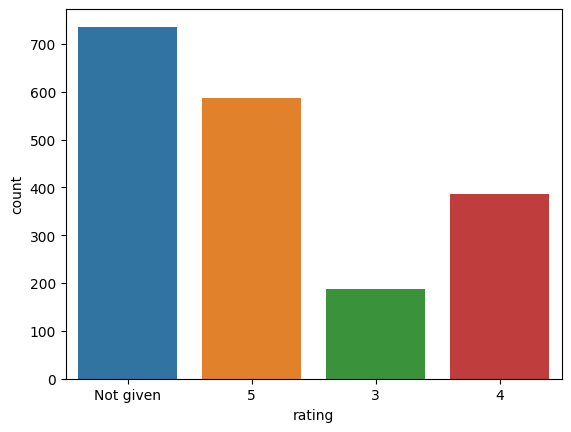

In [ ]:
# visualize counts of ratings
sns.countplot(data=data, x='rating', hue='rating');



*  The most commonly given rating is 5.0
*  The least commonly given rating is 3.0
*  We know that 736 orders were not given a rating






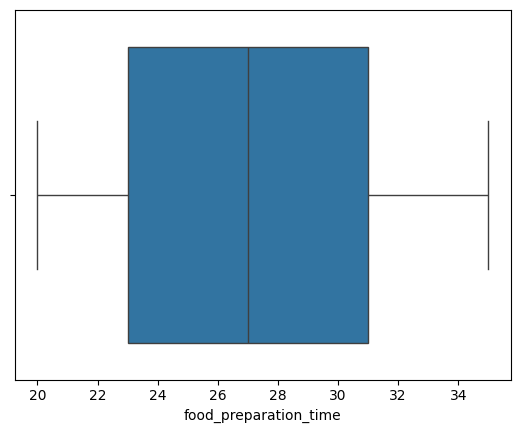

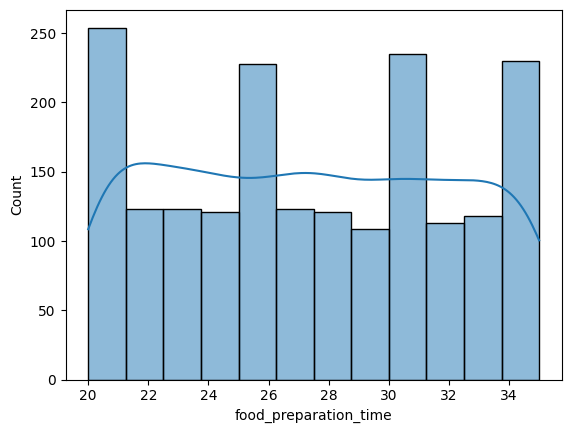

In [ ]:
# view food preparation time data
sns.boxplot(data=data, x='food_preparation_time');
plt.show()
sns.histplot(data=data, x='food_preparation_time', kde=True);
plt.show()

Orders may take anywhere from 20 min to 35 min to prepare. There is a rather even distribution of orders across all food prep times. It appears that 20 min, 25 min, 30 min, and 34 min are the most commonly prep times across the data.

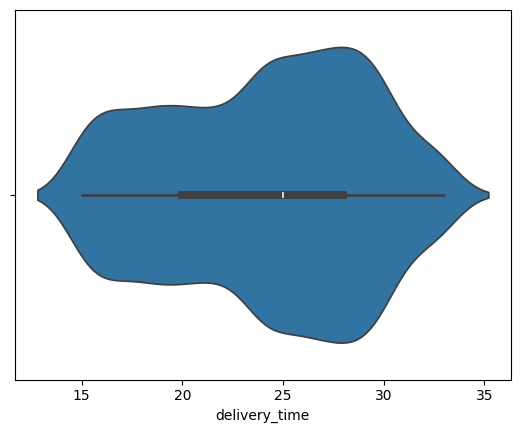

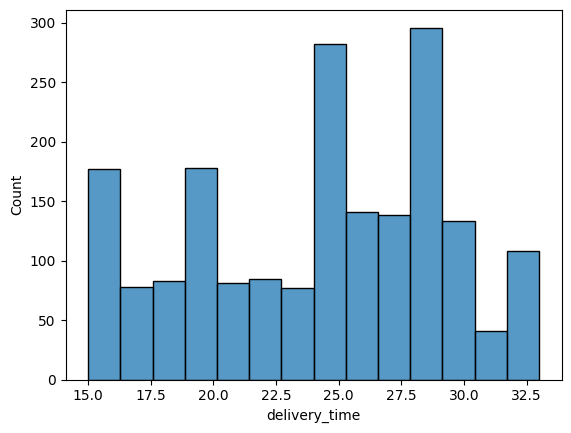

In [ ]:
# view delivery time data
sns.violinplot(data=data, x='delivery_time');
plt.show()
sns.histplot(data=data, x='delivery_time');
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# view the top 5 most frequently ordered from restaurants
data['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


The top 5 restaurants in terms of number of orders are

1.   Shake Shack (219 orders)
2.   The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 order)
5. Parm (68 orders)



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
data.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

American Cuisine is the most popular cuisine type ordered on the weekend with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# find the percentage of order which cost more that $20
percentage_over20 = data[data['cost_of_the_order']>20.00].shape[0]/data.shape[0]*100

print('The percent of orders placed over $20 is ', round(percentage_over20,2), '%', sep='')

The percent of orders placed over $20 is 29.24%


### **Question 10**: What is the mean order delivery time?

In [ ]:
# find the average delivery time
avg_delivery_time = data['delivery_time'].mean()

print('The average delivery time is', round(avg_delivery_time,2), 'min', sep=' ')

The average delivery time is 24.16 min


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# find the 3 most frequent customers and the number of order they placed
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9




*   Customer [52832] placed 13 orders
*   Customer [47440] placed 10 orders
*   Customer [83287] placed 9 orders





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.

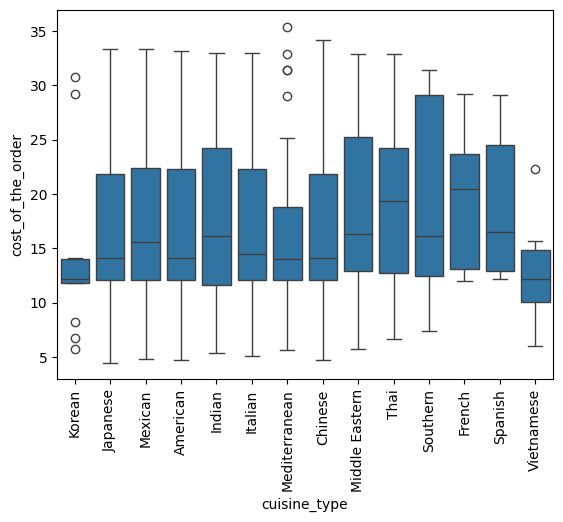

In [ ]:
# view correlation between cuisine type and the cost of the order
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);

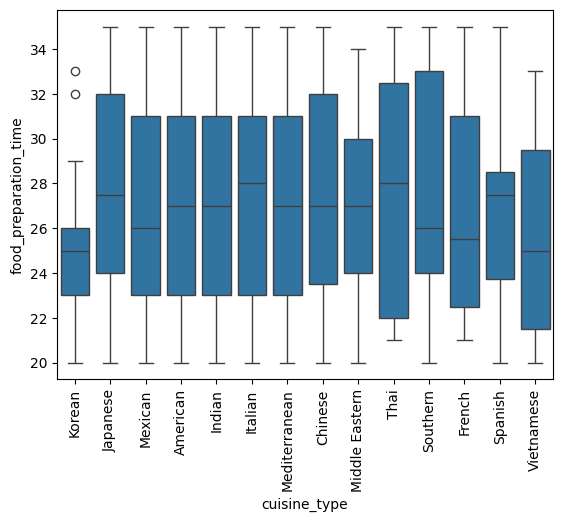

In [ ]:
# view correlation between cuisine type and food preparation time
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

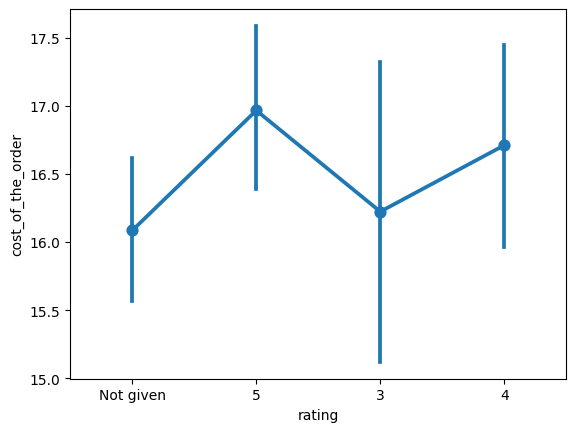

In [ ]:
# view correlation between cost of order and rating
sns.pointplot(data=data, x='rating', y='cost_of_the_order');

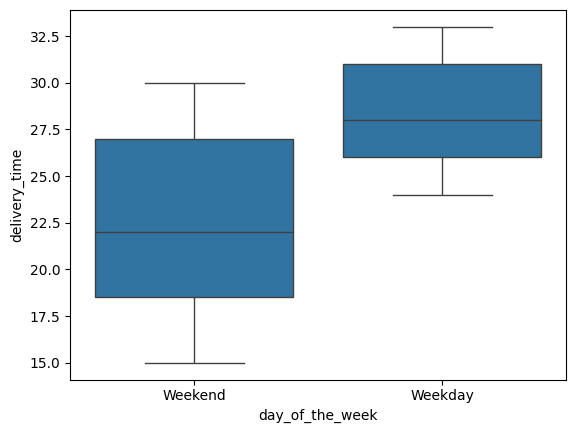

In [ ]:
# view the correlation between day of the week and delivery time
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time');

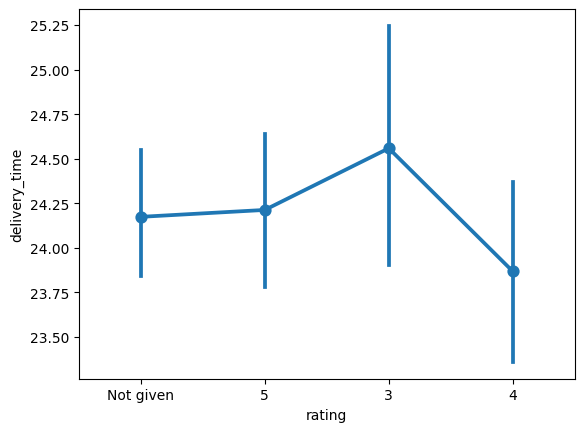

In [ ]:
# view the correlation between rating and delivery time
sns.pointplot(data=data, x='rating', y='delivery_time');

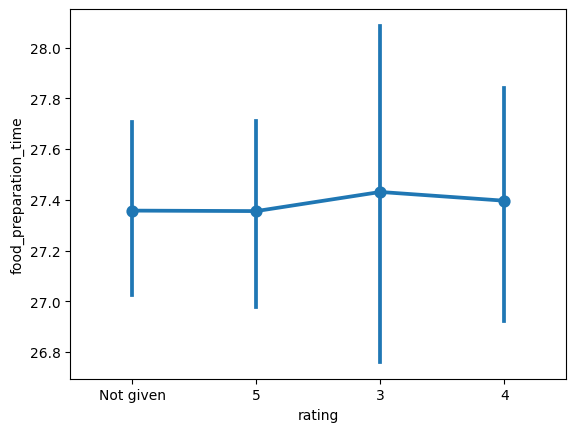

In [ ]:
# view the correlation between rating and food preparation time
sns.pointplot(data=data, x='rating', y='food_preparation_time');

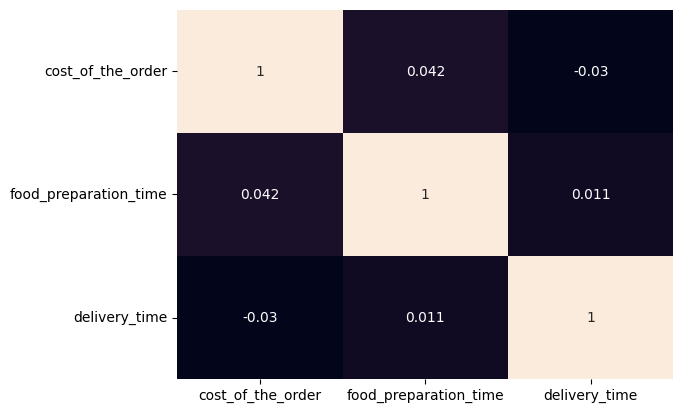

In [ ]:
# visualize correlation via a heatmap
sns.heatmap(data=data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
rated = data[data['rating']!='Not given'].copy()
rated['rating'] = rated['rating'].astype('int')

rating_counts = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
rating_counts


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Woorijip,1
152,Xe May Sandwich Shop,1
153,Zero Otto Nove,1
154,da Umberto,1


In [ ]:
promo_rest = rating_counts[rating_counts['rating']>50]
promo_rest_name = promo_rest['restaurant_name']
promo_rest_name

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken


In [ ]:
mean_4 = rated[rated['restaurant_name'].isin(promo_rest_name)].copy()

In [ ]:
mean_4.groupby(['restaurant_name'])['rating'].mean()

,rating
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
def calc_rev(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return x*0

data['Revenue'] = data['cost_of_the_order'].apply(calc_rev)
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
total_rev = data['Revenue'].sum()

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data[data['total_time']>60].shape[0]/100

2.0

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
data[data['day_of_the_week']=='Weekday']['delivery_time'].mean()

np.float64(28.340036563071298)

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

In [ ]:
data[data['day_of_the_week']=='Weekend']['delivery_time'].mean()

np.float64(22.4700222057735)